### LOGISTIC REGRESSION
The aim is to learn about logistic regression as a method of classification.Examples of classification problems include spam versus"ham" email, loan Default(yes/no)..Disease diagnosis.All these are binary classification problem.

The convention for binary classification is to have 2 classes 0 and 1.

Here we cant use the normal linear regression.Since it gives continuous values as predictions.

Hence instead of a linear regression, we have a logistic regression curve.Here probability lies between zero and 1...irrespective of the size ofthe data . The datawill either be category zero or category 1.

The sigmoid(logistic)function takes values between zero and 1.
MEANING WE CAN TAKE OUR LINEAR REGRESSION SOLUTION AND PLACE IT INTO THE SIGMOID FUNCTION.
THIS RESULTS INTO VALUES BETWEEN ZERO AND ONE.

we can have a cut point of 0.5 and any value below it belongs to class zero while any value above belongs to class 1.

After doing logistic regression, the next thing is to perform the text of our model performance and this is done using a confusionmetrix for example.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("Desktop/python/titanic_train-221207-091540.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
##DIONGG EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

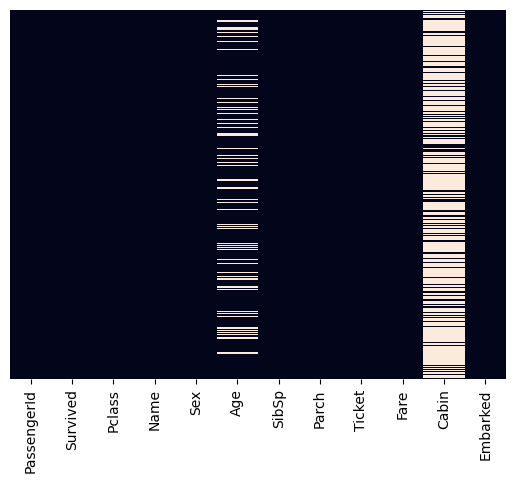

In [6]:
#we WANT TO VISUALIZE OUR NULL VALUES
sns.heatmap(train.isnull(),yticklabels=False, cbar=False )

<Axes: xlabel='Survived', ylabel='count'>

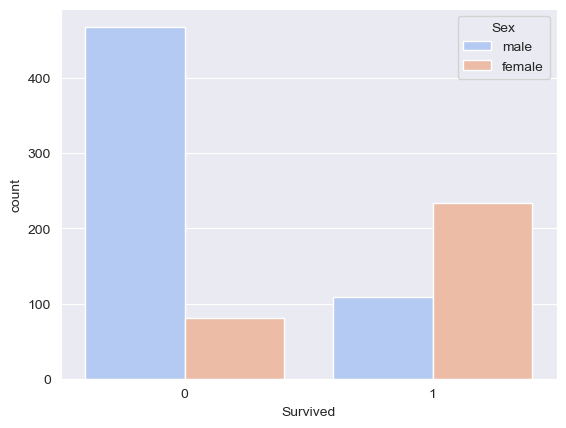

In [8]:
sns.set_style("darkgrid")
sns.countplot(x="Survived", hue="Sex", data=train, palette="coolwarm")

In [12]:
train["Pclass"] = train["Pclass"].astype(str)#this is to do away with the error numpy.int64 ha no attribute"startswith"

<Axes: xlabel='Survived', ylabel='count'>

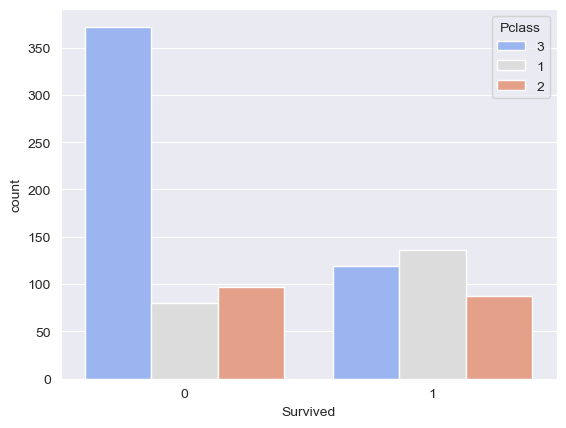

In [14]:
sns.countplot(x="Survived", hue="Pclass", data=train, palette="coolwarm")
#sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [15]:
train[train["Survived"] ==0]["Pclass"].value_counts()#no of people who died per class

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [16]:
#lets find out their proportion with respect to the total no oof people originally in these classes.
train[train["Survived"] ==0]["Pclass"].value_counts()/train["Pclass"].value_counts()

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: count, dtype: float64

In [17]:
np.round(train[train["Survived"] ==0]["Pclass"].value_counts()/train["Pclass"].value_counts()*100,2)

Pclass
1    37.04
2    52.72
3    75.76
Name: count, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

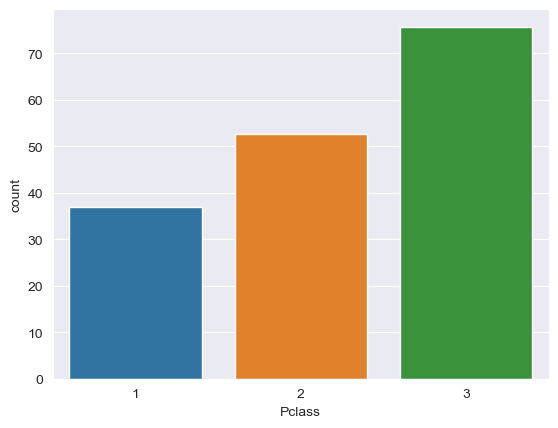

In [18]:
plt.Figure(figsize=(5,5))
sns.barplot(y=np.round(train[train["Survived"] ==0]["Pclass"].value_counts()/train["Pclass"].value_counts()*100,2),x=np.round(train[train["Survived"] ==0]["Pclass"].value_counts()/train["Pclass"].value_counts()*100,2).index)
            

C:\Users\USER\AppData\Local\Temp\ipykernel_1988\1781747146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

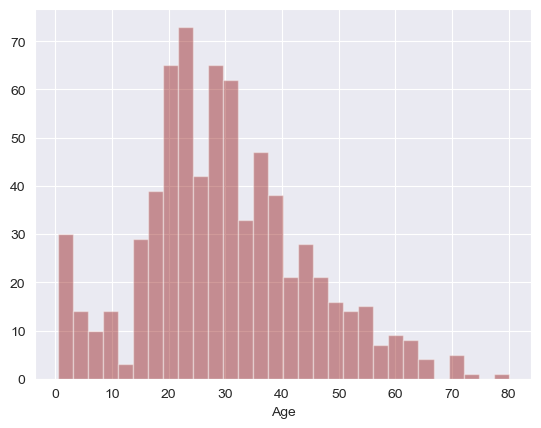

In [19]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

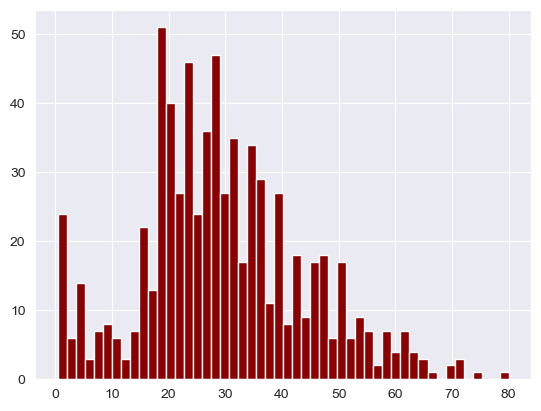

In [20]:
train["Age"].hist(bins=50, color="darkred")

<Axes: ylabel='Frequency'>

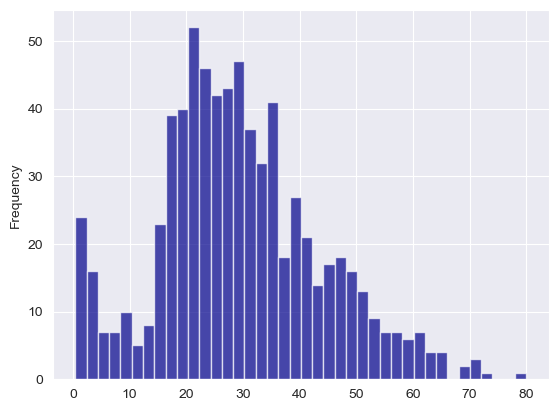

In [21]:
train["Age"].plot.hist(bins=40, color="darkblue",alpha=0.7)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

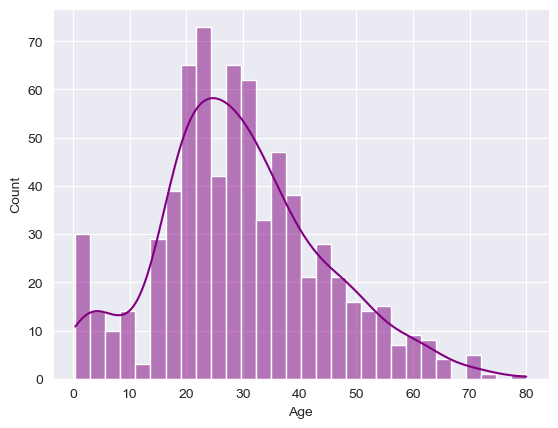

In [22]:
sns.histplot(train["Age"], bins = 30,color="purple", kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

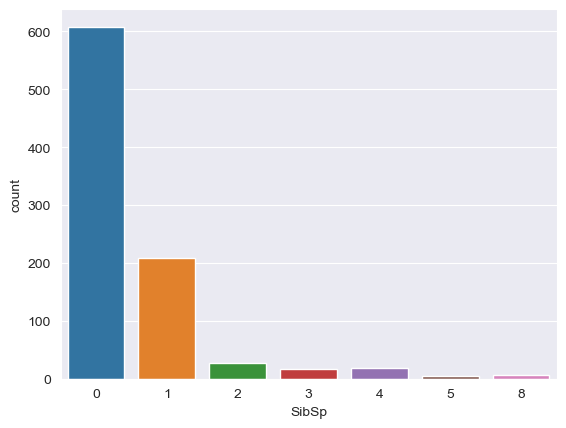

In [23]:
#thesisp means an extrasibling from a couple
sns.countplot(x="SibSp", data=train)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

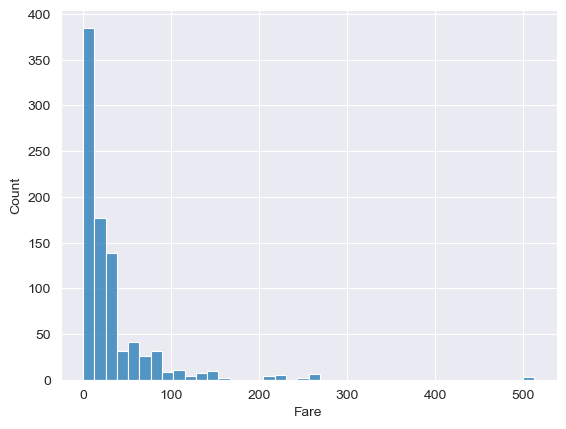

In [24]:
#then lets the amount these people paid for the trip....we can adjust this by multiplying this by 30.72 and adjust it to inflation
sns.histplot(train["Fare"],bins = 40)

<Axes: xlabel='Pclass', ylabel='Age'>

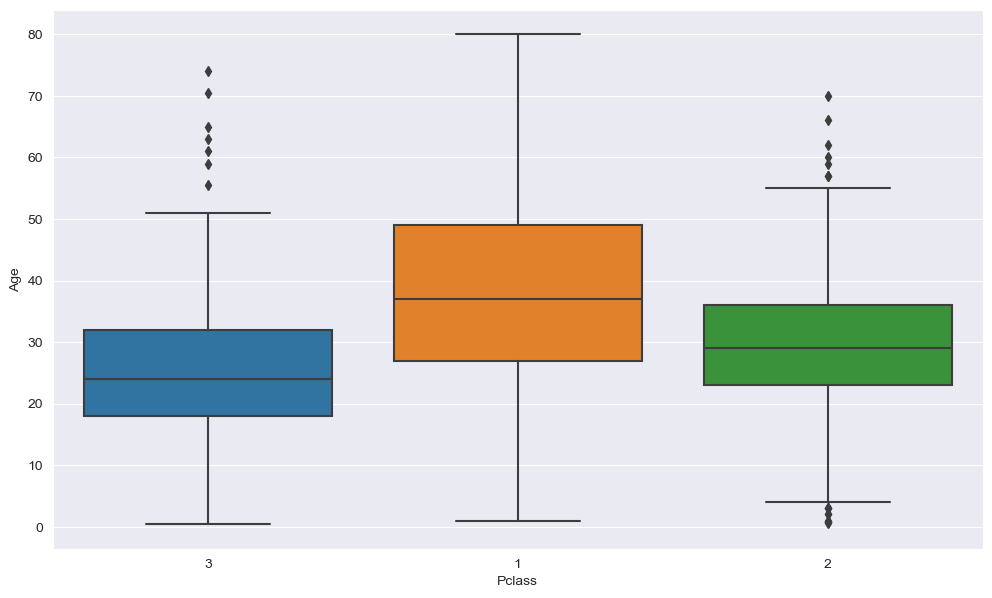

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=train)

In [32]:
train["Pclass"] = train["Pclass"].astype(int)#we cannot obtain our result if the pclass dtype is str instead convert to int

In [34]:
np.round(train[train["Pclass"]==1]["Age"].mean(),2)

38.23

In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
           return 38.23
        elif Pclass == 2:
            return 29.38
        else:
            return 25.18
    else:
        return Age
    
        
    



In [36]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_1988\1709689700.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_1988\1709689700.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

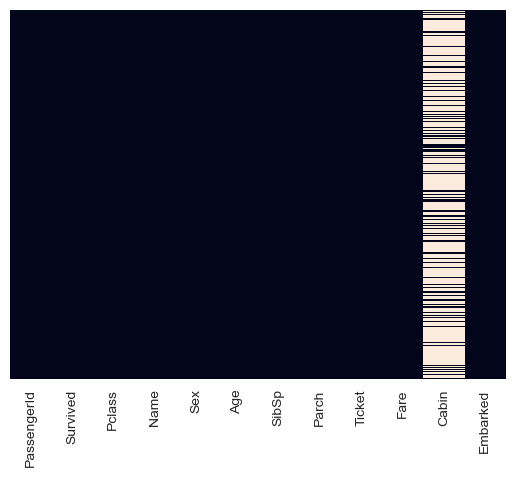

In [37]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False )

In [38]:
train=train.drop("Cabin", axis=1)

In [39]:
#creating dummy variables for sex and embarked so the computer can encodethem with eaSE
#Multicollinearity might occur where one variableis a perfect predictor of the other. And after creating dummy variables, we shall have 
#columns or more
# and we ask it to dropfirst to reduce  the noof colums
sex = pd.get_dummies(train["Sex"], drop_first = True, dtype = int)
embarked = pd.get_dummies(train["Embarked"], drop_first = True, dtype=int)

In [40]:
train =pd.concat([sex, embarked], axis=1)

In [41]:
train.head()

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [43]:
 train = pd.read_csv("Desktop/python/titanic_train-221207-091540.csv")

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train[train["Pclass"]==3]["Age"].mean()

25.14061971830986

In [46]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass== 2:
            return 29.88
        else:
            return 25.14
    else:
        return Age


In [47]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_1988\4124013998.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_1988\4124013998.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


In [48]:
train = train.drop("Cabin", axis =1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
sex = pd.get_dummies(train["Sex"], drop_first = True, dtype = int)
embarked = pd.get_dummies(train["Embarked"], drop_first = True, dtype=int)

In [51]:
train =pd.concat([sex, embarked,train], axis=1)

In [52]:
train.head()

,male,Q,S,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,0,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,0,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,1,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
train= train.drop(["Name", "Sex", "Embarked", "Ticket"], axis =1)

In [54]:
train.head()

,male,Q,S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833
2,0,0,1,3,1,3,26.0,0,0,7.9250
3,0,0,1,4,1,1,35.0,1,0,53.1000
4,1,0,1,5,0,3,35.0,0,0,8.0500


In [55]:
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression( solver = "lbfgs", max_iter = 1000)

In [60]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
print(confusion_matrix(y_test, predictions))

[[134  20]
 [ 37  77]]
